In [1]:
import calour as ca
import calour_utils as cu

failed to load logging config file


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pwd

'/Users/amnon/git/dbbact-paper/notebooks/fig2-querying'

In [4]:
ca.set_log_level(11)

In [5]:
%matplotlib inline

In [6]:
db=ca.database._get_database_class('dbbact')

creating logger


# Load the dataset
from:

Differences in the gut microbiomes of dogs and wolves: roles of antibiotics and starch. 

Liu, Y., Liu, B., Liu, C., Hu, Y., Liu, C., Li, X., Li, X., Zhang, X., Irwin, D.M., Wu, Z. and Chen, Z. 

BMC Veterinary Research, 2021, 17(1), pp.1-8.

https://doi.org/10.1186/s12917-021-02815-y

In [8]:
dat=ca.read_amplicon('./all.dogwolf.biom','./map.dogwolf.txt',normalize=10000,min_reads=1000)

2022-07-27 17:00:32 INFO loaded 42 samples, 487 features
2022-07-27 17:00:32 WARNING Found 26 samples that have metadata but do not have data. These samples have been dropped.
2022-07-27 17:00:32 INFO First 5 samples without data: ['SRR13737291', 'SRR13737335', 'SRR13737334', 'SRR13765887', 'SRR13737317']
2022-07-27 17:00:32 INFO After filtering, 40 samples remaining.


In [9]:
datc=dat.cluster_features(10)

2022-07-27 17:00:38 INFO After filtering, 263 features remaining.


In [10]:
datc=datc.sort_samples('Host')

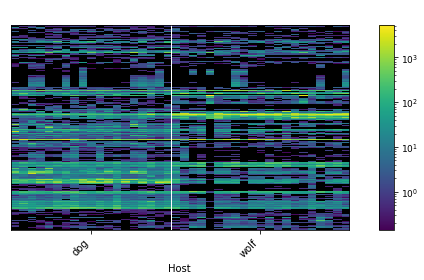

In [11]:
f=datc.plot(sample_field='Host')

# Find the dog/wolf specific sequences

In [12]:
dd=datc.diff_abundance('Host','dog','wolf',random_seed=2022)

2022-07-27 17:00:42 INFO 40 samples with both values
2022-07-27 17:00:42 INFO After filtering, 263 features remaining.
2022-07-27 17:00:42 INFO 19 samples with value 1 (dog), 21 samples with value2 (wolf)
2022-07-27 17:00:42 INFO number of higher in dog: 137. number of higher in wolf : 56. total 193


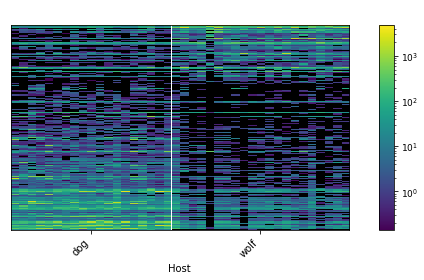

In [13]:
dd.plot(sample_field='Host')

# Get the top dbBact enriched terms for each group compare to the other
Limit to 7 terms per direction so we can do the per-experiment enrichment calculation (within the bars)

2022-07-27 17:00:49 INFO Getting dbBact annotations for 193 sequences, please wait...
2022-07-27 17:00:49 INFO Limited to maximal annotationid: 7440
2022-07-27 17:00:53 INFO got 4112 annotations
2022-07-27 17:00:53 WARNING ignoring 32 annotation with id > max_id 7440
2022-07-27 17:00:53 INFO Got 23439 annotation-sequence pairs
2022-07-27 17:00:53 INFO Added annotation data to experiment. Total 4080 annotations, 193 ASVs
2022-07-27 17:00:53 INFO Found 1 experiments ([753]) matching current experiment - ignoring them.
2022-07-27 17:00:55 INFO found 7 negative
2022-07-27 17:00:57 INFO found 7 positive


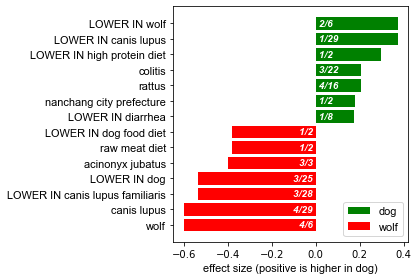

In [14]:
f,e=dd.plot_diff_abundance_enrichment(ignore_exp=True,labels_kwargs={'family':'Arial','size':11},numbers_kwargs={'family':'arial','size':10,'weight':'bold','color':'white','style':'italic'}, max_id=7440,min_appearances=1,num_results_needed=7,max_show=7,min_exps=2)
ax=plt.gca()
ax.set_aspect(1.0/ax.get_data_ratio()*1)
ax.figure.tight_layout()

In [15]:
f.figure.savefig('./fig-terms-dog-wolf.pdf')

# Also get the dbBact terms without the per-experiment enrichment calculation so we don't limit ourselves to 7 results per direction
For saving the complete table

2022-07-27 17:01:02 INFO Found 1 experiments ([753]) matching current experiment - ignoring them.


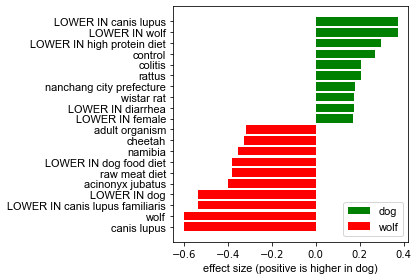

In [16]:
f,e=dd.plot_diff_abundance_enrichment(ignore_exp=True,labels_kwargs={'family':'Arial','size':11},numbers_kwargs={'family':'arial','size':10,'weight':'bold','color':'white','style':'italic'}, max_id=7440,min_exps=2)
ax=plt.gca()
ax.set_aspect(1.0/ax.get_data_ratio()*1)
ax.figure.tight_layout()

In [17]:
e.save('./terms-dog-wolf')

2022-07-27 17:01:03 INFO Metadata field taxonomy not found. Saving biom table without metadata


In [18]:
e.feature_metadata[:20]

,term,odif,pvals,num_enriched_exps,num_total_exps
canis lupus,canis lupus,-0.602450,0.000999,-1.0,-1.0
wolf,wolf,-0.602450,0.000999,-1.0,-1.0
LOWER IN canis lupus familiaris,LOWER IN canis lupus familiaris,-0.536366,0.000999,-1.0,-1.0
LOWER IN dog,LOWER IN dog,-0.536366,0.000999,-1.0,-1.0
acinonyx jubatus,acinonyx jubatus,-0.400547,0.000999,-1.0,-1.0
raw meat diet,raw meat diet,-0.381648,0.000999,-1.0,-1.0
LOWER IN dog food diet,LOWER IN dog food diet,-0.380735,0.000999,-1.0,-1.0
namibia,namibia,-0.355579,0.000999,-1.0,-1.0
cheetah,cheetah,-0.326903,0.000999,-1.0,-1.0
adult organism,adult organism,-0.319213,0.000999,-1.0,-1.0


In [19]:
e.feature_metadata[-20:]

,term,odif,pvals,num_enriched_exps,num_total_exps
panthera leo,panthera leo,-0.241267,0.001998,-1.0,-1.0
lion,lion,-0.241267,0.001998,-1.0,-1.0
mongolia,mongolia,-0.206074,0.003996,-1.0,-1.0
chest,chest,-0.176747,0.001998,-1.0,-1.0
orchard,orchard,-0.154718,0.003996,-1.0,-1.0
commonwealth of massachusetts,commonwealth of massachusetts,0.154327,0.003996,-1.0,-1.0
pan troglodytes,pan troglodytes,0.160584,0.001998,-1.0,-1.0
LOWER IN amerindian,LOWER IN amerindian,0.165798,0.003996,-1.0,-1.0
LOWER IN hunter gatherer,LOWER IN hunter gatherer,0.165798,0.003996,-1.0,-1.0
LOWER IN venezuela,LOWER IN venezuela,0.165798,0.003996,-1.0,-1.0


# Plot the dbBact term PCA

2022-07-27 17:01:32 INFO Calculating per-ASV term scores
2022-07-27 17:01:32 INFO Getting dbBact annotations for 263 sequences, please wait...
2022-07-27 17:01:36 INFO got 4601 annotations
2022-07-27 17:01:36 INFO Got 30662 annotation-sequence pairs
2022-07-27 17:01:36 INFO Added annotation data to experiment. Total 4601 annotations, 263 ASVs
2022-07-27 17:01:36 INFO Found 1 experiments ([753]) matching current experiment - ignoring them.
2022-07-27 17:01:37 INFO After filtering, 3938 features remaining.
2022-07-27 17:01:37 INFO plotting


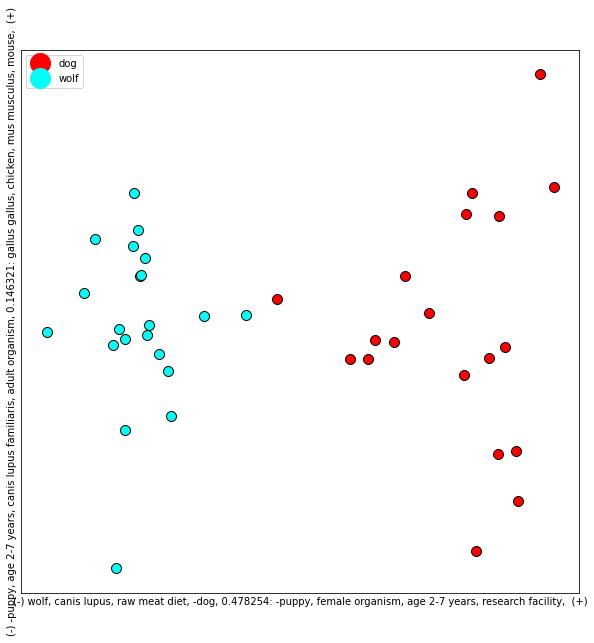

In [20]:
res=db.plot_term_pcoa(datc,'Host',freq_weight='linear',size_scale=20)